In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 

import cptac
import cptac.utils as u

In [4]:
#load GBM data 
brain = cptac.Gbm()
gene = "EGFR"

In [28]:

def plot_lin_regression(df1,x_axis, y_axis, title, ra_stats = False, show_plot = True, save_file_name = "file_name" ):
    #format dfs 
    df1_subset = df1[[x_axis,y_axis]]
    #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
    df1_subset = df1_subset.dropna(axis=0, how="any")

    x1 = df1_subset[[x_axis]].values
    y1 = df_gbm_subset[[y_axis]].values
    x1 = x1[:,0]
    y1 = y1[:,0]

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    if ra_stats:
        print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))
        
    sns.set(style="darkgrid")
    plot = sns.regplot(x=x1, y=y1, data=df1)
    plot.set(xlabel=x_axis, ylabel=y_axis, title=title)
    if show_plot:
        plt.show()
        plt.clf()        
        plt.close()
        
    if save_file_name != "file_name":
        plt.savefig(save_file_name+'.png')
        
    

In [5]:
Ccrcc = cptac.Ccrcc()

In [6]:
 #Step 1 - Create df
df_gbm = brain.get_proteomics()
df_gbm


Name,A1BG,A2M,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,...,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Sample_ID,,,,,,,,,,,,,,,,,,,,,
S001,0.077630,0.487228,-0.254208,-0.144373,0.551881,-0.025276,-0.467451,-0.089511,-0.078806,0.329603,...,NaN,-0.047437,-0.105908,-0.347076,NaN,0.459635,0.079452,-0.784983,-0.488441,0.167990
S002,-0.145975,0.798796,0.184242,-0.470603,NaN,0.390211,0.245466,-0.609998,0.118625,-0.086927,...,NaN,0.161975,-0.213093,0.235571,NaN,0.107421,0.048724,0.138403,-0.290141,0.405037
S003,0.821991,1.096470,-0.094421,-0.106304,0.084578,0.176402,-0.248151,0.014061,-0.699773,-0.638462,...,NaN,-0.065534,-0.306717,0.879991,NaN,0.883564,-0.172222,0.011876,-0.131889,-0.503581
S004,-0.064567,0.129385,0.047751,-0.118187,0.237434,NaN,0.303847,0.322163,-0.555479,-0.363414,...,-0.062127,-0.254535,0.463653,0.580230,0.503044,-0.604986,0.178077,-0.720059,-0.150197,-0.268715
S005,-0.763691,-1.031834,-0.217194,-0.695701,0.184173,-0.474816,-0.051789,0.344842,-0.642746,0.068863,...,NaN,-0.092502,0.010639,-0.465079,NaN,-0.500083,0.112651,1.004660,-0.230304,-0.102416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S111,-1.624156,-1.163916,-0.570896,0.608478,0.756814,NaN,0.136388,1.792089,-0.047550,0.595335,...,NaN,0.298664,-0.403930,-0.482597,0.240966,NaN,0.609314,-1.293464,0.225910,-0.013637
S112,-1.452245,-1.147384,-0.373231,0.584371,NaN,-1.670928,-0.074499,1.893627,-0.369483,0.244199,...,NaN,0.155988,0.002551,-0.834434,NaN,-0.073908,0.637394,-0.795886,0.326046,-0.217014
S113,-1.902994,-1.162469,-0.411892,0.534934,NaN,0.598046,-0.382636,1.997332,-0.134316,0.500731,...,NaN,0.016857,-0.171858,-0.462233,NaN,1.278683,0.616285,-0.734952,0.339283,-0.419138


Slope of regression: -0.1637256664824653
R-squared: 0.4115691431244513
P-value: 5.6518915861054995e-14


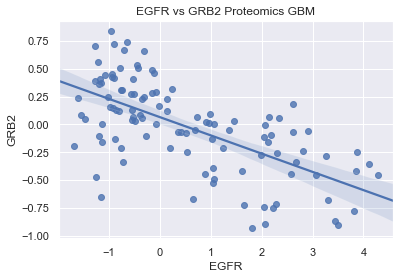

In [29]:
plot_lin_regression(df_gbm,"EGFR","GRB2","EGFR vs GRB2 Proteomics GBM", ra_stats = True,show_plot = False, save_file_name = "EGFR_GRB2_GBM")

# Ccrcc

In [11]:
df_Ccrcc = Ccrcc.get_proteomics()
df_Ccrcc.columns = df_Ccrcc.columns.droplevel(1)

df_Ccrcc_subset = df_Ccrcc[["EGFR","GRB2"]]
x1 = df_Ccrcc_subset[["EGFR"]].values
y1 = df_Ccrcc_subset[["GRB2"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 0.1950107391201895
R-squared: 0.3190044833364907
P-value: 9.660917045267772e-18


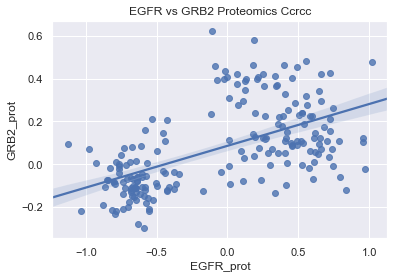

In [12]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df_Ccrcc_subset)
plot.set(xlabel='EGFR_prot', ylabel='GRB2_prot', title='EGFR vs GRB2 Proteomics Ccrcc')
plt.show()

In [13]:

en = cptac.Endometrial()

In [14]:
#format dfs 
df_endo = en.get_proteomics()
df_endo_subset = df_endo[["EGFR","GRB2"]]
df_endo_subset = df_endo_subset.dropna(axis=0, how="any")

x1 = df_endo_subset[["EGFR"]].values
y1 = df_endo_subset[["GRB2"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: -0.25942399931355536
R-squared: 0.19891467379499916
P-value: 2.115854588164119e-08


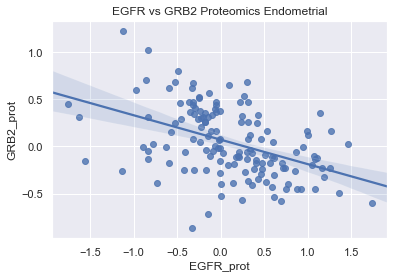

In [15]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df_endo_subset)
plot.set(xlabel='EGFR_prot', ylabel='GRB2_prot', title='EGFR vs GRB2 Proteomics Endometrial')
plt.show()

# 